<a href="https://colab.research.google.com/github/begitawahyuningtyas/Pemograman_Python10/blob/main/TUGAS14__PYTHON_for_WIRELESS_MODELLING_BEGITA_WAHYUNINGTYAS_1101208338_TTX_44_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#numeric to logarithmic
NtL = lambda x: 10*np.log10(x)

In [ ]:
#logarithmic to numeric
LtN = lambda x: 10**(x/10)

In [ ]:
#MENGHITUNG NILAI PATHLOSS (Lp)

def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [ ]:
#MENGHITUNG NILAI DAYA TERIMA DALAM miliWatt (nPrx)
def Daya(Ptx,Lp,Gtx,Grx):
  #Ptx = Daya Transmitter (miliWatt)
  #Lp = PathLoss (dB)
  #Gtx = Gain Antena Transmitter (dB)
  #Grx = Gain Antena Receiver (dB)
  nPtx= NtL(Ptx)
  Prx = nPtx-Lp+Gtx+Grx
  nPrx = LtN(Prx)

  return nPrx

In [ ]:
#MENGHITUNG NILAI SINYAL TO NOISE RATION (SNR)
def Noise(nPrx,Bw):
  #nPrx = Daya Terima (miliWatt)
  #Bw = Bandwidth (Hz)
  N = -174+NtL(Bw)
  nN = LtN(N)
  SNR = nPrx/nN

  return SNR

In [ ]:
#MENGHITUNG NILSI KAPASITAS (KAP)
def Cap(SNR,Bw):
  #SNR = Sinyal to Noise Ration ()
  #Bw = Bandwidth (Hz)
  KAP = Bw*np.log2(1+SNR)

  return KAP

##Frekuensi 1800MHz

In [ ]:
#MASUKAN NILAI PARAMETER

ht=80 #m 
hr=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #titik
Ptx=30000 #miliWatt
Gtx=10 #dB
Grx=2 #dB
Bw=5000000 #Hz
f=1800 #MHz
loc1='urban'
loc2='suburban'
loc3='open'

d=np.random.randint(dmin,dmax,N)

In [ ]:
print(d)

[890 505 919 703 387 685 812 909 834 800 379 505 775 571 975 609 579 320
 454 377 306 644 661 398 529 876 446 953 328 599 354 421 455 362 798 784
 312 930 430 470 628 838 752 452 657 308 882 897 690 908 589 521 945 530
 996 488 406 953 342 970 875 428 964 373 448 988 791 555 975 818 313 360
 650 898 549 892 631 742 487 671 344 887 935 532 307 831 801 651 895 444
 404 830 343 920 361 437 422 354 304 492 716 795 409 313 869 455 642 633
 706 947 744 576 534 306 379 706 992 775 474 560 537 458 764 348 740 640
 571 369 383 318 388 762 556 414 499 838 613 574 897 908 967 846 403 540
 678 707 454 533 668 386 308 394 573 662 716 668 344 439 928 334 678 887
 801 314 765 758 817 374 455 865 979 741 788 514 528 956 721 315 544 912
 724 712 605 380 442 535 592 314 909 900 935 716 548 512 348 416 439 558
 991 648]


In [ ]:
#MENGHITUNG NILAI PATHLOSS MASING-MASING DAERAH

LpUrban= cos(f,loc1,ht,hr,d)
LpSuburban= cos(f,loc2,ht,hr,d)
LpOpen= cos(f,loc3,ht,hr,d)

In [ ]:
#MENGHITUNG NILAI DAYA TERIMA MASING-MASING DAERAH

nPrxUrban= Daya(Ptx,LpUrban,Gtx,Grx)
nPrxSuburban= Daya(Ptx,LpSuburban,Gtx,Grx)
nPrxOpen= Daya(Ptx,LpOpen,Gtx,Grx)

In [ ]:
Prxd_sort= d[np.argsort(d)]
PrxUrban_sort= nPrxUrban[np.argsort(d)]
PrxSuburban_sort= nPrxSuburban[np.argsort(d)]
PrxOpen_sort= nPrxOpen[np.argsort(d)]

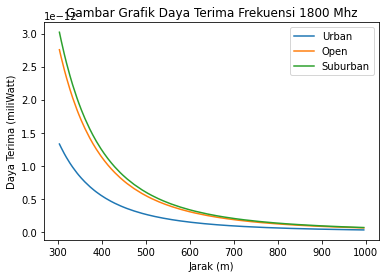

In [ ]:
#MENAMPILKAN GRAFIK DAYA TERIMA

plt.figure()
plt.plot(Prxd_sort,PrxUrban_sort, label='Urban')
plt.plot(Prxd_sort,PrxOpen_sort, label='Open')
plt.plot(Prxd_sort,PrxSuburban_sort, label= 'Suburban')
plt.legend()
plt.title('Gambar Grafik Daya Terima Frekuensi 1800 Mhz')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (miliWatt)')
plt.show()

In [ ]:
#MENGHITUNG NILAI SNR MASING-MASING DAERAH

SNRUrban= Noise(nPrxUrban,Bw)
SNRSuburban= Noise(nPrxSuburban,Bw)
SNROpen= Noise(nPrxOpen,Bw)

In [ ]:
SNRd_sort=d[np.argsort(d)]
SNRUrban_sort= SNRUrban[np.argsort(d)]
SNRSuburban_sort = SNRSuburban[np.argsort(d)]
SNROpen_sort = SNROpen[np.argsort(d)]

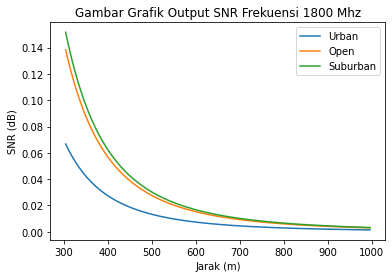

In [ ]:
#MENAMPILKAN GRAFIK SNR

plt.figure()
plt.plot(SNRd_sort,SNRUrban_sort, label='Urban')
plt.plot(SNRd_sort,SNROpen_sort, label='Open')
plt.plot(SNRd_sort,SNRSuburban_sort, label= 'Suburban')
plt.legend()
plt.title('Gambar Grafik Output SNR Frekuensi 1800 Mhz')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

In [ ]:
#MENGHITUNG NILAI KAPASITAS MASING-MASING DAERAH

KAPUrban= Cap(SNRUrban,Bw)
KAPSuburban= Cap(SNRSuburban,Bw)
KAPOpen= Cap(SNROpen,Bw)

In [ ]:
KAPd_sort=d[np.argsort(d)]
KAPUrban_sort= KAPUrban[np.argsort(d)]
KAPSuburban_sort = KAPSuburban[np.argsort(d)]
KAPOpen_sort = KAPOpen[np.argsort(d)]

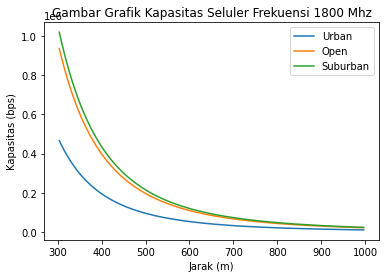

In [ ]:
#MENAMPILKAN GRAFIK KAPASITAS

plt.figure()
plt.plot(KAPd_sort,KAPUrban_sort, label='Urban')
plt.plot(KAPd_sort,KAPOpen_sort, label='Open')
plt.plot(KAPd_sort,KAPSuburban_sort, label= 'Suburban')
plt.legend()
plt.title('Gambar Grafik Kapasitas Seluler Frekuensi 1800 Mhz')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()

##MODEL URBAN

In [ ]:
#MASUKAN NILAI PARAMETER

ht=80 #m 
hr=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #titik
Ptx=30000 #miliWatt
Gtx=10 #dB
Grx=2 #dB
Bw=5000000 #Hz
frek1=700 #MHz
frek2=900 #MHz
frek3=1800 #MHz
loc='urban'

d=np.random.randint(dmin,dmax,N)

In [ ]:
print(d)

[824 547 482 830 828 583 469 405 541 750 672 960 523 452 842 337 904 974
 346 667 303 551 689 761 606 485 576 919 472 332 647 471 637 509 531 710
 994 730 330 887 695 652 336 373 581 693 981 395 643 603 389 552 360 436
 304 431 563 592 976 914 965 648 399 406 628 688 678 516 899 716 678 911
 707 695 416 425 667 950 319 683 895 612 697 559 943 864 323 672 431 765
 904 732 663 948 470 684 740 672 509 468 541 942 468 879 919 627 848 804
 672 359 991 440 560 885 744 418 948 362 923 822 936 836 316 432 368 575
 808 551 652 557 898 787 868 678 949 912 494 308 936 391 984 636 723 836
 335 396 819 757 596 451 645 346 908 662 907 794 850 349 902 394 400 333
 732 443 823 967 726 485 805 930 649 699 972 457 823 770 964 738 913 529
 999 529 571 342 974 483 361 377 875 395 458 339 413 876 944 693 959 619
 921 361]


In [ ]:
#MENGHITUNG NILAI PATHLOSS MASING-MASING FREKUENSI

LpFrek1= cos(frek1,loc,ht,hr,d)
LpFrek2= cos(frek2,loc,ht,hr,d)
LpFrek3= cos(frek3,loc,ht,hr,d)

In [ ]:
#MENGHITUNG NILAI DAYA TERIMA MASING-MASING FREKUENSI
nPrxFrek1= Daya(Ptx,LpFrek1,Gtx,Grx)
nPrxFrek2= Daya(Ptx,LpFrek2,Gtx,Grx)
nPrxFrek3= Daya(PTx,LpFrek3,GTx,GRx)

In [ ]:
nPrxd_sort=d[np.argsort(d)]
nPrxFrek1_sort= nPrxFrek1[np.argsort(d)]
nPrxFrek2_sort= nPrxFrek2[np.argsort(d)]
nPrxFrek3_sort= nPrxFrek3[np.argsort(d)]

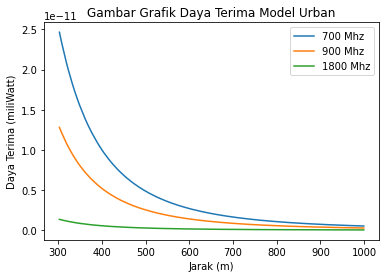

In [ ]:
#MENAMPILKAN GRAFIK DAYA TERIMA

plt.figure()
plt.plot(nPrxd_sort,nPrxFrek1_sort, label='700 Mhz')
plt.plot(nPrxd_sort,nPrxFrek2_sort, label='900 Mhz')
plt.plot(nPrxd_sort,nPrxFrek3_sort, label= '1800 Mhz')
plt.legend()
plt.title('Gambar Grafik Daya Terima Model Urban')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (miliWatt)')
plt.show()

In [ ]:
#MENGHITUNG NILAI SNR MASING-MASING DAERAH

SNRFrek1= Noise(nPrxFrek1,Bw)
SNRFrek2= Noise(nPrxFrek2,Bw)
SNRFrek3= Noise(nPrxFrek3,Bw)

In [ ]:
SNRd_sort=d[np.argsort(d)]
SNRFrek1_sort= SNRFrek1[np.argsort(d)]
SNRFrek2_sort= SNRFrek2[np.argsort(d)]
SNRFrek3_sort= SNRFrek3[np.argsort(d)]

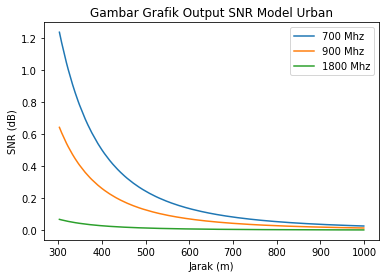

In [ ]:
plt.figure()
plt.plot(SNRd_sort,SNRFrek1_sort, label='700 Mhz')
plt.plot(SNRd_sort,SNRFrek2_sort, label='900 Mhz')
plt.plot(SNRd_sort,SNRFrek3_sort, label= '1800 Mhz')
plt.legend()
plt.title('Gambar Grafik Output SNR Model Urban')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

In [ ]:
#MENGHITUNG NILAI KAPASITAS MASING-MASING DAERAH

KAPFrek1= Cap(SNRFrek1,Bw)
KAPFrek2= Cap(SNRFrek2,Bw)
KAPFrek3= Cap(SNRFrek3,Bw)

In [ ]:
KAPd_sort=d[np.argsort(d)]
KAPFrek1_sort= KAPFrek1[np.argsort(d)]
KAPFrek2_sort= KAPFrek2[np.argsort(d)]
KAPFrek3_sort= KAPFrek3[np.argsort(d)]

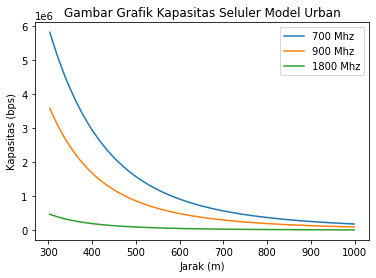

In [ ]:
plt.figure()
plt.plot(KAPd_sort,KAPFrek1_sort, label='700 Mhz')
plt.plot(KAPd_sort,KAPFrek2_sort, label='900 Mhz')
plt.plot(KAPd_sort,KAPFrek3_sort, label= '1800 Mhz')
plt.legend()
plt.title('Gambar Grafik Kapasitas Seluler Model Urban')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()